<h1>Most Expensive Lego Theme</h1>
<h3>Goals for this project:</h3>
<ul><li>Let's scrape lego.com to find the Lego theme with the most expensive products.</li>
<li>We can't use the well-worn Beautiful Soup since Lego.com has a lot of Javascript components that need to be rendered. Therefore, we need to scrape the fully rendered webpage using Selenium.</li></ul>

In [ ]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from tqdm import tqdm

In [ ]:
driver = webdriver.Chrome()
driver.get("https://www.lego.com/en-us/themes")

# grab all of the Lego themes on the page
themes = driver.find_elements(By.XPATH, 
                              "/html/body/div[1]/div/main/div/div[2]/div/div/section/ul/li")

# get links to follow for each of the themes
links = []
for theme in themes:
    links.append(theme.find_element(By.XPATH, "./article/a").get_attribute("href"))

links = links[:-1] # the last theme has no products

<ul><li>Make a function for grabbing all of the prices of the products that belong in a Lego theme, given the theme's url.</li></ul>

In [ ]:
def getPrices(url, div_location = 5):
    driver = webdriver.Chrome()
    driver.get(url)
    prices = driver.find_elements(By.XPATH, 
                        f"/html/body/div[1]/div/main/div/div[{div_location}]/div/div/section/div/div[2]/div/ul/li/div/div[3]/div[1]/div[3]/div/span[1]")
    prices = [float(price.get_attribute("textContent").lstrip("Price\n$")) for price in prices]
    driver.close()
    return prices

<ul><li>Make another function for updating our running list of prices by adding the data for one Lego theme.</li></ul>

In [62]:
def updatePrices(list_to_update, # running list of prices
                 links, # list of URLs to check
                 idx, # index of the desired URL in the list
                 div_location = 5):
    update = {'theme' : links[idx].split('/')[-1], # name of theme
              'prices' : getPrices(links[idx], div_location)}
    if update['prices'] != []:
        print(update)
        list_to_update.append(update)
    else:
        div_location -= 1 # the HTML tags might be set up differently on some pages
        updatePrices(list_to_update, links, idx, div_location) # try again in this case

prices = []
for i in tqdm(range(len(links))):
    updatePrices(prices, links, i)

  3%|▎         | 1/39 [00:23<14:53, 23.51s/it]

{'theme': 'architecture', 'prices': [129.99, 59.99, 49.99, 99.99, 119.99, 59.99, 39.99, 119.99, 59.99]}


  5%|▌         | 2/39 [01:09<22:29, 36.47s/it]

{'theme': 'lego-batman-sets', 'prices': [269.99, 99.99, 119.99, 5.99, 29.99, 14.99, 9.99, 39.99, 5.99, 199.99, 79.99, 5.99, 29.99, 21.99, 59.99, 59.99, 29.99]}


  8%|▊         | 3/39 [01:34<18:46, 31.29s/it]

{'theme': 'brickheadz', 'prices': [19.99, 24.99, 19.99, 24.99, 9.99, 9.99, 19.99, 14.99, 39.99, 9.99, 19.99, 19.99, 49.99, 14.99, 14.99, 9.99, 19.99, 19.99]}


 10%|█         | 4/39 [02:03<17:49, 30.56s/it]

{'theme': 'brick-sketches', 'prices': [16.99, 16.99, 16.99, 16.99]}


 13%|█▎        | 5/39 [02:47<20:07, 35.52s/it]

{'theme': 'city', 'prices': [39.99, 19.99, 99.99, 29.99, 29.99, 9.99, 69.99, 199.99, 9.99, 129.99, 9.99, 59.99, 29.99, 64.99, 99.99, 39.99, 189.99]}


 15%|█▌        | 6/39 [03:34<21:35, 39.25s/it]

{'theme': 'classic', 'prices': [99.99, 49.99, 69.99, 34.99, 29.99, 9.99, 14.99, 59.99, 7.99, 7.99, 19.99, 59.99, 7.99, 49.99, 39.99, 19.99, 19.99, 59.99]}


 18%|█▊        | 7/39 [04:01<18:52, 35.38s/it]

{'theme': 'creator-3-in-1', 'prices': [99.99, 49.99, 29.99, 19.99, 119.99, 44.99, 119.99, 14.99, 9.99, 59.99, 14.99, 19.99, 19.99, 19.99, 49.99, 9.99, 49.99, 14.99]}


 21%|██        | 8/39 [04:24<16:10, 31.31s/it]

{'theme': 'creator-expert', 'prices': [199.99, 679.99, 229.99, 299.99, 199.99, 199.99, 49.99, 549.99, 49.99, 169.99, 179.99, 99.99, 99.99, 239.99, 99.99, 59.99, 169.99]}


 23%|██▎       | 9/39 [05:09<17:48, 35.62s/it]

{'theme': 'dc', 'prices': [269.99, 99.99, 119.99, 14.99, 21.99, 29.99, 199.99, 39.99, 5.99, 29.99, 79.99, 59.99, 5.99, 5.99, 29.99, 59.99]}


 26%|██▌       | 10/39 [05:54<18:36, 38.50s/it]

{'theme': 'disney', 'prices': [99.99, 39.99, 49.99, 99.99, 34.99, 9.99, 14.99, 9.99, 39.99, 99.99, 16.99, 64.99, 89.99, 44.99, 29.99, 349.99, 16.99, 44.99]}


 28%|██▊       | 11/39 [06:40<19:03, 40.84s/it]

{'theme': 'mickey-mouse', 'prices': [54.99, 24.99, 5.99, 44.99, 34.99, 29.99, 39.99, 19.99, 19.99, 9.99, 34.99, 5.99]}


 31%|███       | 12/39 [07:28<19:22, 43.05s/it]

{'theme': 'lightyear', 'prices': [49.99, 34.99, 19.99]}


 33%|███▎      | 13/39 [08:13<18:51, 43.53s/it]

{'theme': 'dots', 'prices': [64.99, 39.99, 3.99, 29.99, 34.99, 19.99, 5.99, 24.99, 12.99, 34.99, 49.99, 5.99, 19.99, 12.99, 19.99, 34.99, 5.99]}


 36%|███▌      | 14/39 [08:58<18:18, 43.94s/it]

{'theme': 'duplo', 'prices': [129.99, 29.99, 69.99, 54.99, 49.99, 19.99, 34.99, 64.99, 29.99, 19.99, 64.99, 19.99, 44.99, 24.99, 49.99, 19.99, 49.99]}


 38%|███▊      | 15/39 [09:44<17:50, 44.62s/it]

{'theme': 'friends', 'prices': [159.99, 69.99, 19.99, 59.99, 79.99, 29.99, 9.99, 99.99, 19.99, 89.99, 99.99, 69.99, 64.99, 89.99, 69.99, 9.99, 19.99]}


 41%|████      | 16/39 [10:29<17:11, 44.85s/it]

{'theme': 'disney-frozen-2', 'prices': [9.99, 19.99, 44.99, 29.99, 219.99, 5.99, 49.99, 9.99, 5.99, 39.99, 29.99, 19.99]}


 44%|████▎     | 17/39 [10:53<14:08, 38.55s/it]

{'theme': 'harry-potter', 'prices': [469.99, 499.99, 79.99, 39.99, 24.99, 44.99, 49.99, 49.99, 89.99, 34.99, 119.99, 149.99, 34.99, 24.99, 89.99, 34.99, 34.99]}


 46%|████▌     | 18/39 [11:16<11:47, 33.71s/it]

{'theme': 'ideas', 'prices': [299.99, 169.99, 119.99, 299.99, 249.99, 179.99, 229.99, 249.99, 99.99, 99.99, 119.99, 249.99, 399.99, 79.99, 179.99, 119.99, 69.99]}


 49%|████▊     | 19/39 [12:01<12:26, 37.32s/it]

{'theme': 'jurassic-world', 'prices': [99.99, 139.99, 44.99, 49.99, 99.99, 19.99, 34.99, 39.99, 15.99, 49.99, 79.99, 44.99, 44.99, 16.99, 19.99, 29.99, 29.99]}


 51%|█████▏    | 20/39 [12:47<12:36, 39.83s/it]

{'theme': 'art', 'prices': [79.99, 149.99, 99.99, 119.99, 249.99, 17.99, 17.99, 119.99, 119.99, 119.99, 119.99]}


 54%|█████▍    | 21/39 [13:32<12:25, 41.43s/it]

{'theme': 'avatar', 'prices': [149.99, 99.99, 59.99, 79.99, 24.99, 59.99, 34.99, 99.99, 44.99, 19.99]}


 56%|█████▋    | 22/39 [14:18<12:07, 42.79s/it]

{'theme': 'lego-education', 'prices': [133.95, 133.95, 214.95, 133.95, 209.95, 399.95, 159.95, 94.95, 69.95, 319.95, 239.95, 239.95, 169.95, 284.95]}


 59%|█████▉    | 23/39 [15:03<11:33, 43.37s/it]

{'theme': 'lego-icons', 'prices': [629.99, 229.99, 679.99, 59.99, 399.99, 399.99, 49.99, 99.99, 169.99, 49.99, 49.99, 229.99, 49.99, 549.99, 239.99, 59.99, 199.99]}


 62%|██████▏   | 24/39 [15:48<10:56, 43.76s/it]

{'theme': 'super-mario', 'prices': [269.99, 5.99, 59.99, 49.99, 24.99, 29.99, 64.99, 14.99, 34.99, 59.99, 9.99, 199.99, 129.99, 59.99, 269.99, 79.99, 59.99]}


 64%|██████▍   | 25/39 [16:33<10:21, 44.37s/it]

{'theme': 'lord-of-the-rings', 'prices': [19.99, 14.99, 19.99]}


 67%|██████▋   | 26/39 [16:56<08:12, 37.92s/it]

{'theme': 'marvel', 'prices': [249.99, 54.99, 99.99, 49.99, 14.99, 24.99, 34.99, 14.99, 99.99, 549.99, 349.99, 349.99, 89.99, 69.99, 159.99, 24.99, 14.99]}


 69%|██████▉   | 27/39 [17:42<08:04, 40.38s/it]

{'theme': 'mindstorms', 'prices': [359.99]}


 72%|███████▏  | 28/39 [18:28<07:41, 41.95s/it]

{'theme': 'minecraft', 'prices': [64.99, 44.99, 34.99, 24.99, 9.99, 129.99, 49.99, 24.99, 49.99, 99.99, 19.99, 24.99, 19.99, 9.99, 29.99, 44.99, 34.99, 34.99]}


 74%|███████▍  | 29/39 [19:23<07:38, 45.89s/it]

{'theme': 'minifigures', 'prices': [4.99, 29.94, 30.0, 14.99, 4.99, 34.99, 14.99, 29.94, 10.99, 19.99, 19.99, 24.99, 4.99, 34.99, 5.99, 15.99, 14.99, 9.99]}


 77%|███████▋  | 30/39 [19:51<06:04, 40.46s/it]

{'theme': 'minions', 'prices': [19.99, 49.99, 5.99, 39.99, 29.99, 19.99, 5.99]}


 79%|███████▉  | 31/39 [20:36<05:33, 41.74s/it]

{'theme': 'monkie-kid', 'prices': [159.99, 189.99, 19.99, 159.99, 79.99, 139.99, 19.99, 79.99, 39.99, 99.99, 59.99, 129.99, 89.99, 69.99, 129.99, 149.99, 169.99]}


 82%|████████▏ | 32/39 [21:21<05:00, 42.90s/it]

{'theme': 'ninjago', 'prices': [79.99, 99.99, 99.99, 349.99, 34.99, 19.99, 19.99, 149.99, 9.99, 59.99, 44.99, 64.99, 119.99, 9.99, 139.99, 79.99, 34.99]}


 85%|████████▍ | 33/39 [22:07<04:23, 43.86s/it]

{'theme': 'powered-up', 'prices': [399.99, 34.99, 249.99, 22.99, 79.99, 13.99, 9.99, 39.99, 299.99, 16.99, 13.99, 89.99, 39.99, 49.99, 159.99, 39.99]}


 87%|████████▋ | 34/39 [22:53<03:42, 44.45s/it]

{'theme': 'serious-play', 'prices': [36.99, 789.99, 754.99, 484.99]}


 90%|████████▉ | 35/39 [23:39<02:59, 44.77s/it]

{'theme': 'speed-champions', 'prices': [24.99, 19.99, 19.99, 34.99, 34.99, 24.99, 24.99, 24.99, 19.99, 19.99, 19.99, 19.99, 44.99, 49.99, 19.99, 29.99, 49.99, 19.99]}


 92%|█████████▏| 36/39 [24:23<02:13, 44.55s/it]

{'theme': 'lego-spider-man', 'prices': [349.99, 24.99, 16.99, 34.99, 24.99, 49.99, 9.99, 9.99, 14.99, 19.99, 69.99, 19.99, 5.99, 24.99, 19.99, 5.99, 19.99, 14.99]}


 95%|█████████▍| 37/39 [24:46<01:16, 38.13s/it]

{'theme': 'star-wars', 'prices': [19.99, 64.99, 849.99, 139.99, 849.99, 599.99, 9.99, 39.99, 239.99, 399.99, 69.99, 139.99, 59.99, 99.99, 44.99, 9.99, 14.99]}


 97%|█████████▋| 38/39 [25:30<00:40, 40.09s/it]

{'theme': 'technic', 'prices': [49.99, 449.99, 119.99, 199.99, 49.99, 449.99, 119.99, 12.99, 49.99, 209.99, 149.99, 49.99, 149.99, 199.99, 249.99, 99.99, 12.99]}


100%|██████████| 39/39 [26:15<00:00, 40.40s/it]

{'theme': 'vidiyo', 'prices': [19.99, 19.99, 19.99, 19.99, 19.99, 19.99]}


<h1>Data Analysis</h1>
<h3>Notes:</h3>
<ul><li>Okay, we have our dataset. Now we just need to run some metrics.</li><li>To stay organized, we should write the metrics to a Pandas DataFrame.</li></ul>

In [67]:
import pandas as pd

index = []
values = []
for price in prices:
    index.append(price["theme"])
    values.append(pd.Series(price["prices"]))

df = pd.DataFrame({"Mean" : [val.mean() for val in values],
                   "StdDev" : [val.std() for val in values],   
                   "Count" : [len(val) for val in values],
                   "Max" : [val.max() for val in values],   
                   "Min" : [val.min() for val in values]
                  }, index = index)
df

,Mean,StdDev,Count,Max,Min
architecture,82.212222,34.920545,9,129.99,39.99
lego-batman-sets,63.813529,73.683644,17,269.99,5.99
brickheadz,20.267778,10.357183,18,49.99,9.99
brick-sketches,16.990000,0.000000,4,16.99,16.99
city,66.754706,59.449064,17,199.99,9.99
classic,36.878889,26.175626,18,99.99,7.99
creator-3-in-1,42.767778,36.267885,18,119.99,9.99
creator-expert,210.578235,169.612448,17,679.99,49.99
dc,67.177500,74.739743,16,269.99,5.99
disney,64.378889,77.867262,18,349.99,9.99


<ul><li>The StdDev column has a missing value, likely due to computing the standard deviation over a pd.Series with only one value. Let's replace this missing value with 0, since the variance of a series with a single value should be 0.</li></ul>

In [ ]:
df.StdDev = df.StdDev.fillna(0)

<h1>Conclusion</h1><ul><li>Finally, we can settle the question we set out to answer. The most expensive Lego theme is...</li></ul>

In [69]:
df.Mean.idxmax()

'serious-play'

<ul><li>Hmm, it's fairly surprising that the most expensive theme isn't a branded theme like Star Wars or Marvel.</li><li>Let's check the actual prices.</li></ul>

In [72]:
for price in prices:
    if price["theme"] == 'serious-play':
        seriousPlayPrices = price["prices"]
seriousPlayPrices

[36.99, 789.99, 754.99, 484.99]

<ul><li>We should definitely visualize the data we collected.</li></ul>

<AxesSubplot: xlabel='Mean', ylabel='Theme'>

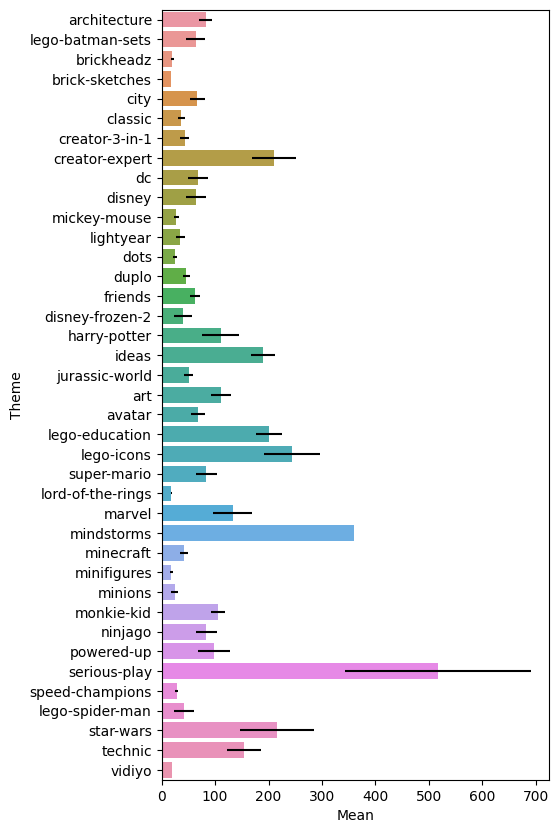

In [94]:
import seaborn as sns
from matplotlib import pyplot as plt
df["StdErr"] = df.StdDev / df.Count ** .5 # compute the standard error
df.index.name = "Theme"
plt.figure(figsize = (5,10))
sns.barplot(data=df.reset_index(), x="Mean", y="Theme", xerr=df.StdErr)

<ul><li>Let's do a worst-case analysis by adding the standard error of the prices to the mean prices, for all themes except the most expensive, but subtracting it for the most expensive.</li></ul>

C:\Users\vaheg\AppData\Local\Temp\ipykernel_16008\3506247258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deltas["serious-play"] *= -1


<AxesSubplot: xlabel='MeanMinMaxTest', ylabel='Theme'>

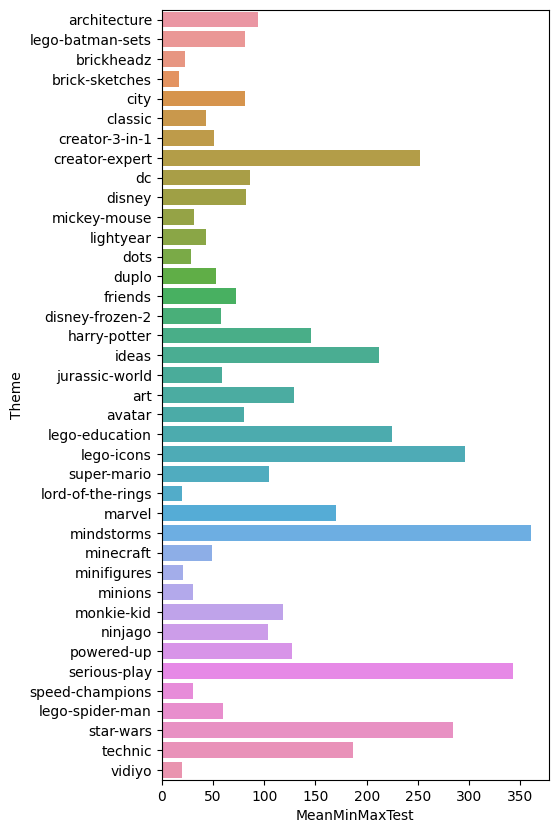

In [97]:
deltas = df.StdErr
deltas["serious-play"] *= -1

df["MeanMinMaxTest"] = df.Mean + deltas
plt.figure(figsize = (5,10))
sns.barplot(data=df.reset_index(), x="MeanMinMaxTest", y="Theme")

<ul><li>The most expensive theme gets beat out in this case.</li></ul>